In [77]:
#Supervised Classification -  Using KMeans

#Soil
#Crop residue
#Sugarcane Crop
#Crop Weed

import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg





In [78]:
w=800
h=600
#K Groups for clustering
K = 4

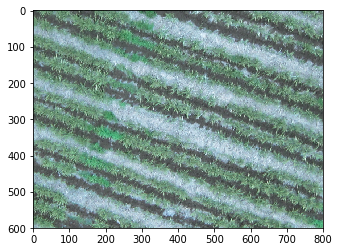

In [79]:
#Read and Resize Image
img = cv2.imread('images/slice.jpg')
resized = cv2.resize(img,(w,h))

#Print Original Image
plt.imshow(resized)
plt.show()

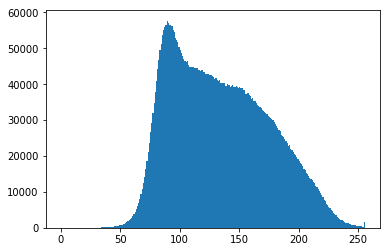

In [80]:
#Original Image Histogram
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

#Resized Image Histogram
#plt.hist(resized.ravel(),256,[0,256]); 
#plt.show()

In [81]:
Z = resized.reshape((-1,3))
Z = np.float32(Z)

In [82]:
#Clustering 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [104]:
centers= np.array([
    [237,231,209],
    [119,147,96],
    [111,138,107],
    [93,89,86]])

print(labels)

[[255   1 135]
 [ 45  69  78]
 [145   0  36]
 [125  24  69]]


In [105]:
#ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

_,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_USE_INITIAL_LABELS,labels)
#print(center)

#print(label)
#print(center)

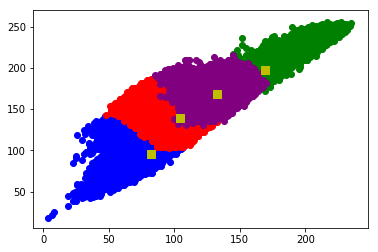

In [106]:
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
C = Z[label.ravel()==2]
D = Z[label.ravel()==3]

# Plot the data
plt.scatter(A[:,0],A[:,1],c = 'b')
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g')
plt.scatter(D[:,0],D[:,1],c = 'purple')

plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
#plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

In [100]:
center = np.uint8(center)
result = center[label.flatten()]
result2 = result.reshape((resized.shape))

print(center)

[[255   1 135]
 [ 45  69  78]
 [145   0  36]
 [125  24  69]]


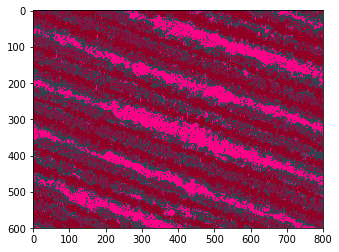

In [101]:
plt.imshow(result2)
plt.show()

In [54]:
#print(result2)

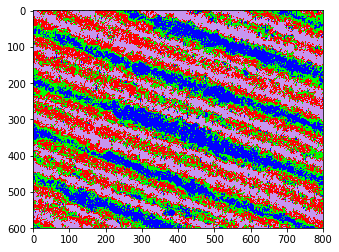

In [69]:
#clase 1 (r)
result2[np.where((result2 == center[0]).all(axis = 2))] = [255,0,0]
#clase 2 (g)
result2[np.where((result2 == center[1]).all(axis = 2))] = [0,255,0]
#clase 3 (b)
result2[np.where((result2 == center[2]).all(axis = 2))] = [0,0,255]
#clase 4 (purple)
result2[np.where((result2 == center[3]).all(axis = 2))] = [199,149,238]

plt.imshow(result2)
plt.show()